In [3]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/Dell/Downloads/Decision Tree/Decision Tree/heart_disease.xlsx"
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(data.head())


        age                                       Age in years
0    Gender                       Gender ; Male - 1, Female -0
1        cp                                    Chest pain type
2  trestbps                             Resting blood pressure
3      chol                                cholesterol measure
4       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes


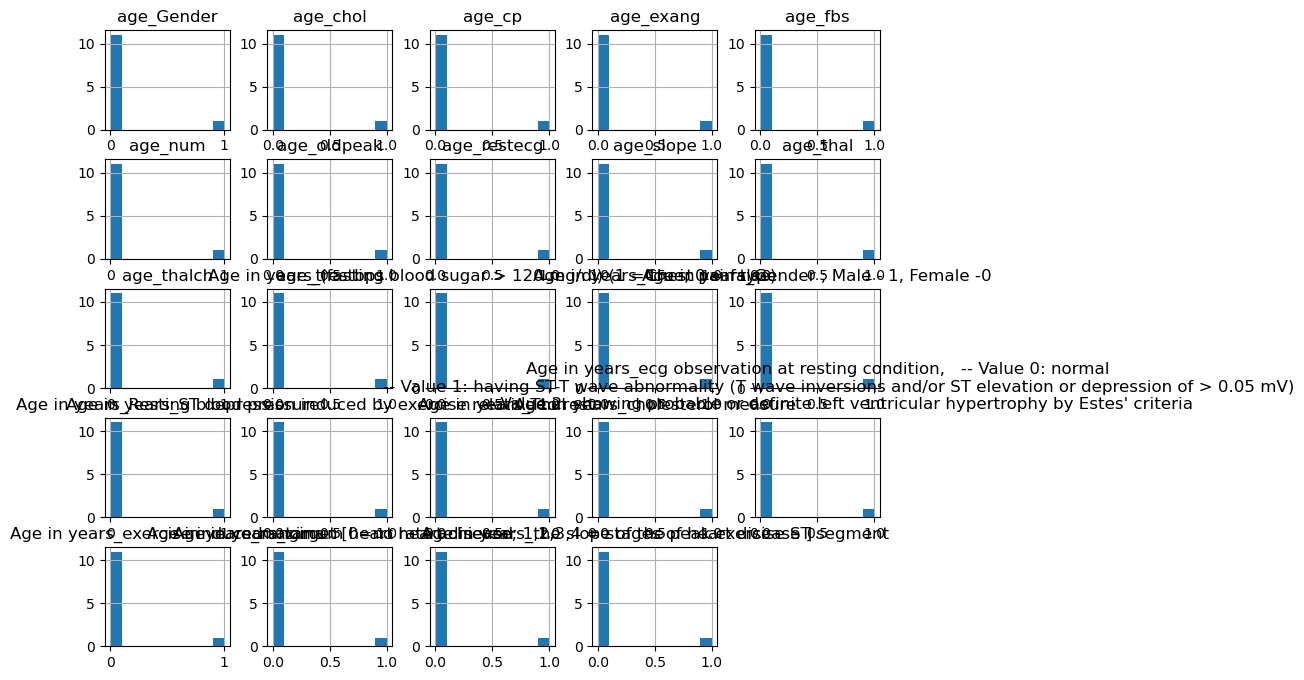

In [6]:
# Perform one-hot encoding on the dataset
data_encoded = pd.get_dummies(data)

# Plot histograms
data_encoded.hist(figsize=(10, 8))
plt.show()


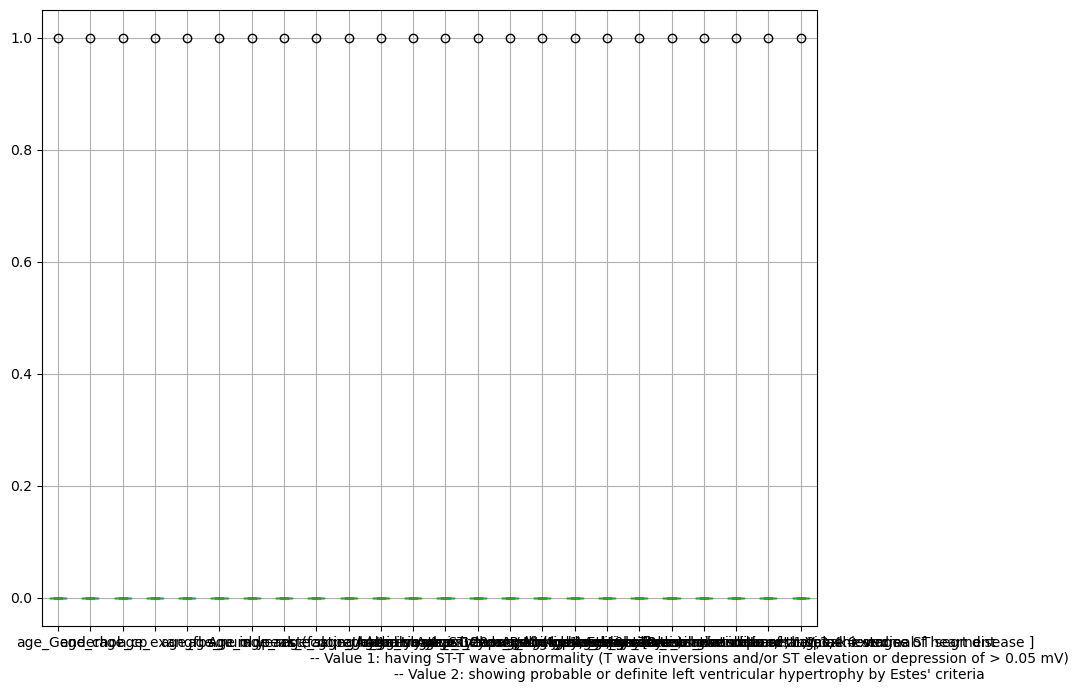

In [7]:
# Box plots
data_encoded.boxplot(figsize=(10, 8))
plt.show()


In [8]:
# Display unique values in each categorical feature
for column in data.columns:
    if data[column].dtype == 'object':
        print(f"Unique values in {column}: {data[column].unique()}")


Unique values in age: ['Gender' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalch' 'exang'
 'oldpeak' 'slope' 'thal' 'num']
Unique values in Age in years: ['Gender ; Male - 1, Female -0' 'Chest pain type' 'Resting blood pressure'
 'cholesterol measure'
 '(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)'
 "ecg observation at resting condition,   -- Value 0: normal\n        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\n        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria"
 'maximum heart rate achieved' 'exercise induced angina'
 'ST depression induced by exercise relative to rest'
 'the slope of the peak exercise ST segment' 'Thal'
 'target [0=no heart disease; 1,2,3,4 = stages of heart disease ]']


In [9]:
# Check for missing values
missing_values = data_encoded.isnull().sum()
print("Missing Values:")
print(missing_values)

# If there are missing values, handle them accordingly (e.g., impute or drop)
# Example:
# data_encoded = data_encoded.dropna()  # Drop rows with missing values
# or
# data_encoded.fillna(data_encoded.mean(), inplace=True)  # Impute missing values with mean


Missing Values:
age_Gender                                                                                                                                                                                                                                                                                        0
age_chol                                                                                                                                                                                                                                                                                          0
age_cp                                                                                                                                                                                                                                                                                            0
age_exang                                                                                                   

In [11]:
# No need to encode categorical variables if already one-hot encoded
# If not encoded, you can use pandas get_dummies or sklearn's OneHotEncoder
# Example:
# data_encoded = pd.get_dummies(data_encoded)


In [13]:
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}



Missing Values:
 age         0
Gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64
Best parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}

Classification Report:
               precision    recall  f1-score   support

         3.0       0.50      1.00      0.67         1
         6.0       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Accuracy:  0.5
Confusion Matrix:
 [[1 0]
 [1 0]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


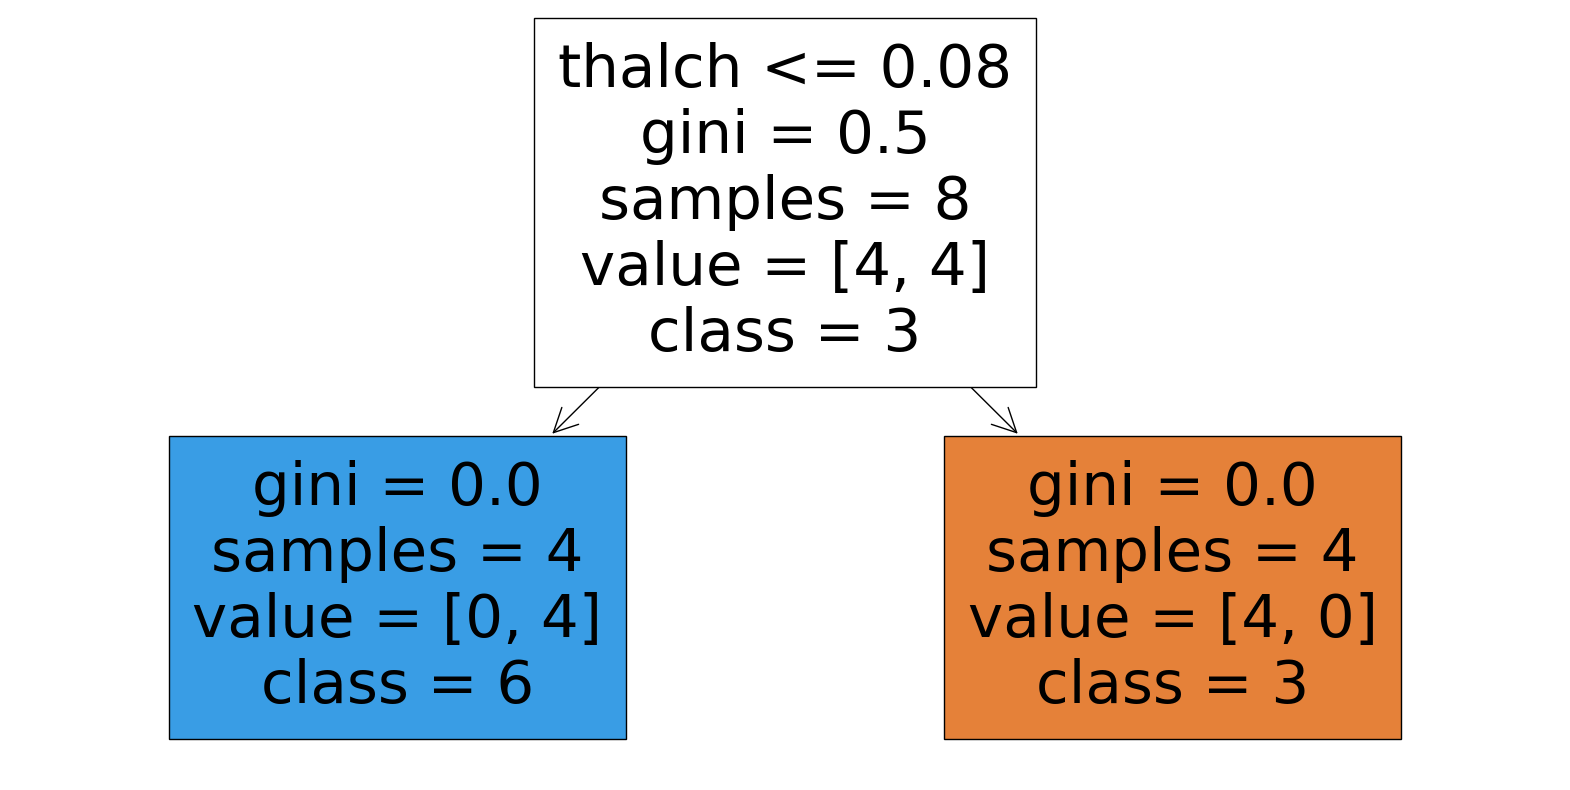

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.utils import resample

# Load the dataset
# Assuming the data is already in the correct format from your previous steps

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Encode categorical features if any
categorical_features = ['Gender', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Split the data into features (X) and target (y)
X = df.drop('num', axis=1)  # Assuming 'num' is the target variable
y = df['num']

# Handle the imbalance using resampling
# Combine X and y into one DataFrame
df_combined = pd.concat([X, y], axis=1)

# Separate the majority and minority classes
df_majority = df_combined[df_combined.num == 6]
df_minority = df_combined[df_combined.num == 3]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Split the data into features and target
X_upsampled = df_upsampled.drop('num', axis=1)
y_upsampled = df_upsampled['num']

# Split the upsampled data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV with reduced number of splits
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
cv = StratifiedKFold(n_splits=3)
grid_search = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Train the model with the best parameters
clf_best = grid_search.best_estimator_
clf_best.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = clf_best.predict(X_test)

# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf_best, feature_names=X.columns.tolist(), class_names=['3', '6'], filled=True)
plt.show()


# What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Hyperparameters of Decision Tree Models:

max_depth:

Description: Specifies the maximum depth of the tree.
Effect: Limits the number of levels in the tree. A deeper tree can capture more complex patterns but is also more prone to overfitting. Conversely, a shallow tree might underfit by not capturing all the complexities of the data.
min_samples_split:

Description: The minimum number of samples required to split an internal node.
Effect: Higher values prevent the model from learning overly specific patterns in the data (reduce overfitting). Lower values make the tree more flexible but can lead to overfitting.
min_samples_leaf:

Description: The minimum number of samples required to be at a leaf node.
Effect: Helps control overfitting by setting a threshold for the minimum number of samples at a leaf. Higher values create more generalized trees.
max_features:

Description: The number of features to consider when looking for the best split.
Effect: Randomly selecting a subset of features can reduce overfitting. Setting it to sqrt(n_features) or log2(n_features) is common in practice.
criterion:

Description: The function to measure the quality of a split (gini for Gini impurity and entropy for information gain).
Effect: Determines how the splits are made. The choice can affect the performance and structure of the tree, but both criteria generally lead to similar results.
max_leaf_nodes:

Description: Maximum number of leaf nodes in the tree.
Effect: Limits the complexity of the model by restricting the number of leaf nodes, thereby controlling overfitting.
min_impurity_decrease:

Description: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
Effect: Controls the threshold for splitting a node, which can help prevent overfitting.
Effects on Performance:

Overfitting: Occurs when the model learns not only the underlying patterns but also the noise in the training data. Hyperparameters like max_depth, min_samples_split, and min_samples_leaf help mitigate overfitting by constraining the growth of the tree.

Underfitting: Happens when the model is too simple to capture the underlying patterns in the data. Setting hyperparameters too conservatively can lead to underfitting.

Hyperparameter tuning involves finding a balance that maximizes the model's ability to generalize to unseen data.

# 2. What is the difference between Label encoding and One-hot encoding?
Label Encoding:

Description: Converts categorical values into integer labels.
How It Works: Each unique category value is assigned an integer. For example, {"red": 0, "green": 1, "blue": 2}.
When to Use: Suitable for ordinal data where the categories have a meaningful order or ranking.
Advantages: Simple and memory-efficient since it uses a single column.
Disadvantages: Can mislead algorithms that assume natural ordering of the labels. For example, 0 < 1 < 2 implies "red" < "green" < "blue", which may not be true.
One-hot Encoding:

Description: Converts categorical values into binary vectors.
How It Works: Creates a new binary column for each category. Each instance is marked with a 1 in the column corresponding to its category and 0 in all other columns. For example, {"red": [1, 0, 0], "green": [0, 1, 0], "blue": [0, 0, 1]}.
When to Use: Suitable for nominal data where categories do not have an inherent order.
Advantages: Prevents the model from assuming any implicit ranking among categories.
Disadvantages: Can lead to high dimensionality, especially with a large number of categories, which can increase computational complexity and memory usage.
Comparison Summary:

Label Encoding is efficient and simple but can mislead models if there is no natural order in the categories.
One-hot Encoding prevents ordinal relationships but can increase the number of features significantly.
In practice, one-hot encoding is often preferred for nominal categorical data, while label encoding is used for ordinal categorical data.







